=== COMPARAISON DES APPROCHES AUTORÉGRESSIVES VS VECTORIELLES ===
Chargement des données...
Données autorégressives: 2000 horizons
Données vectorielles: 147 horizons

Génération des graphiques de comparaison...


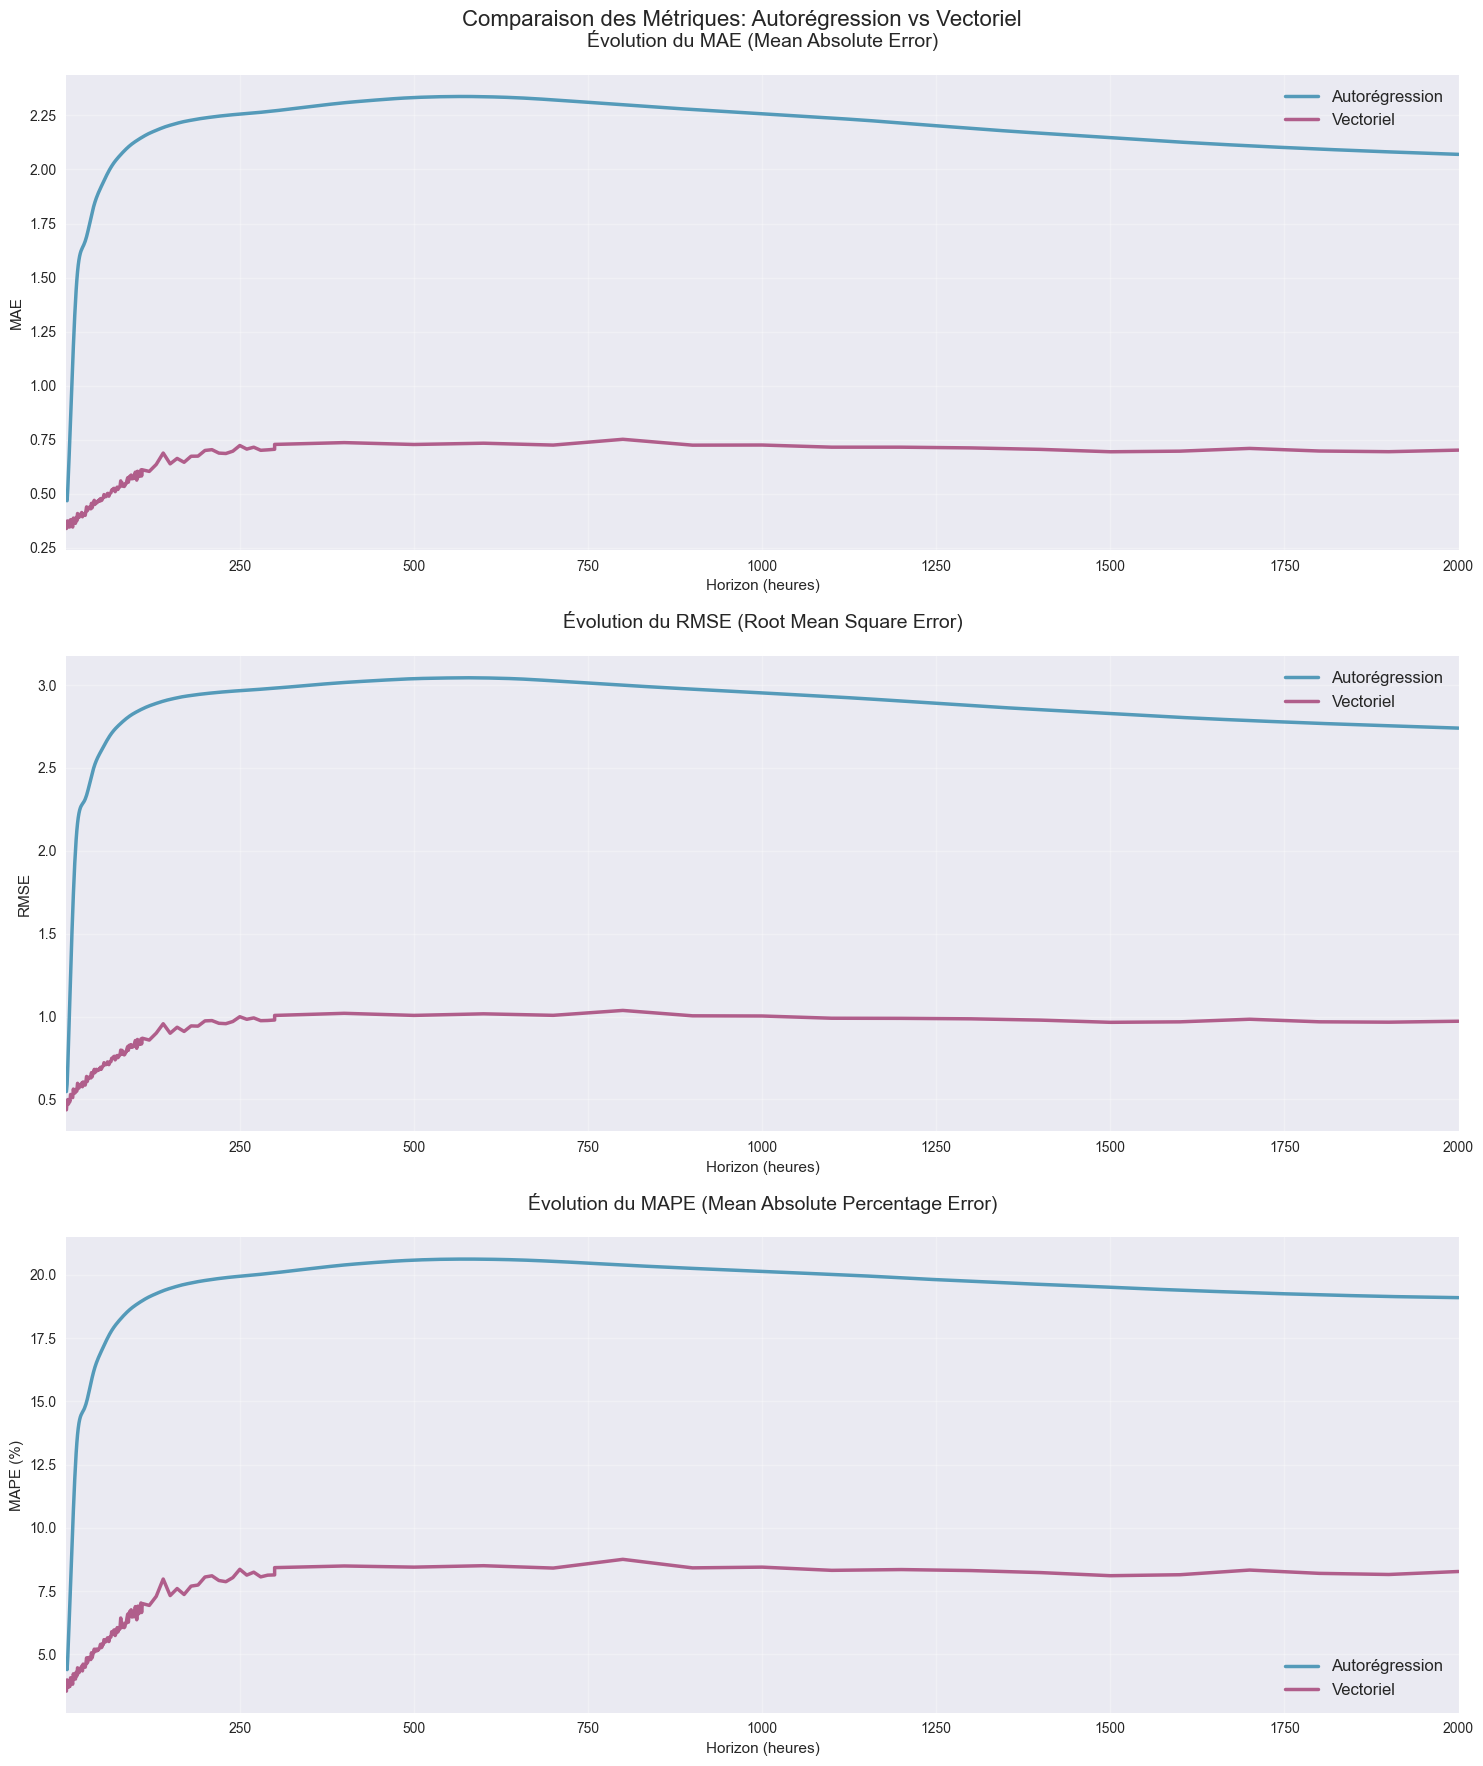

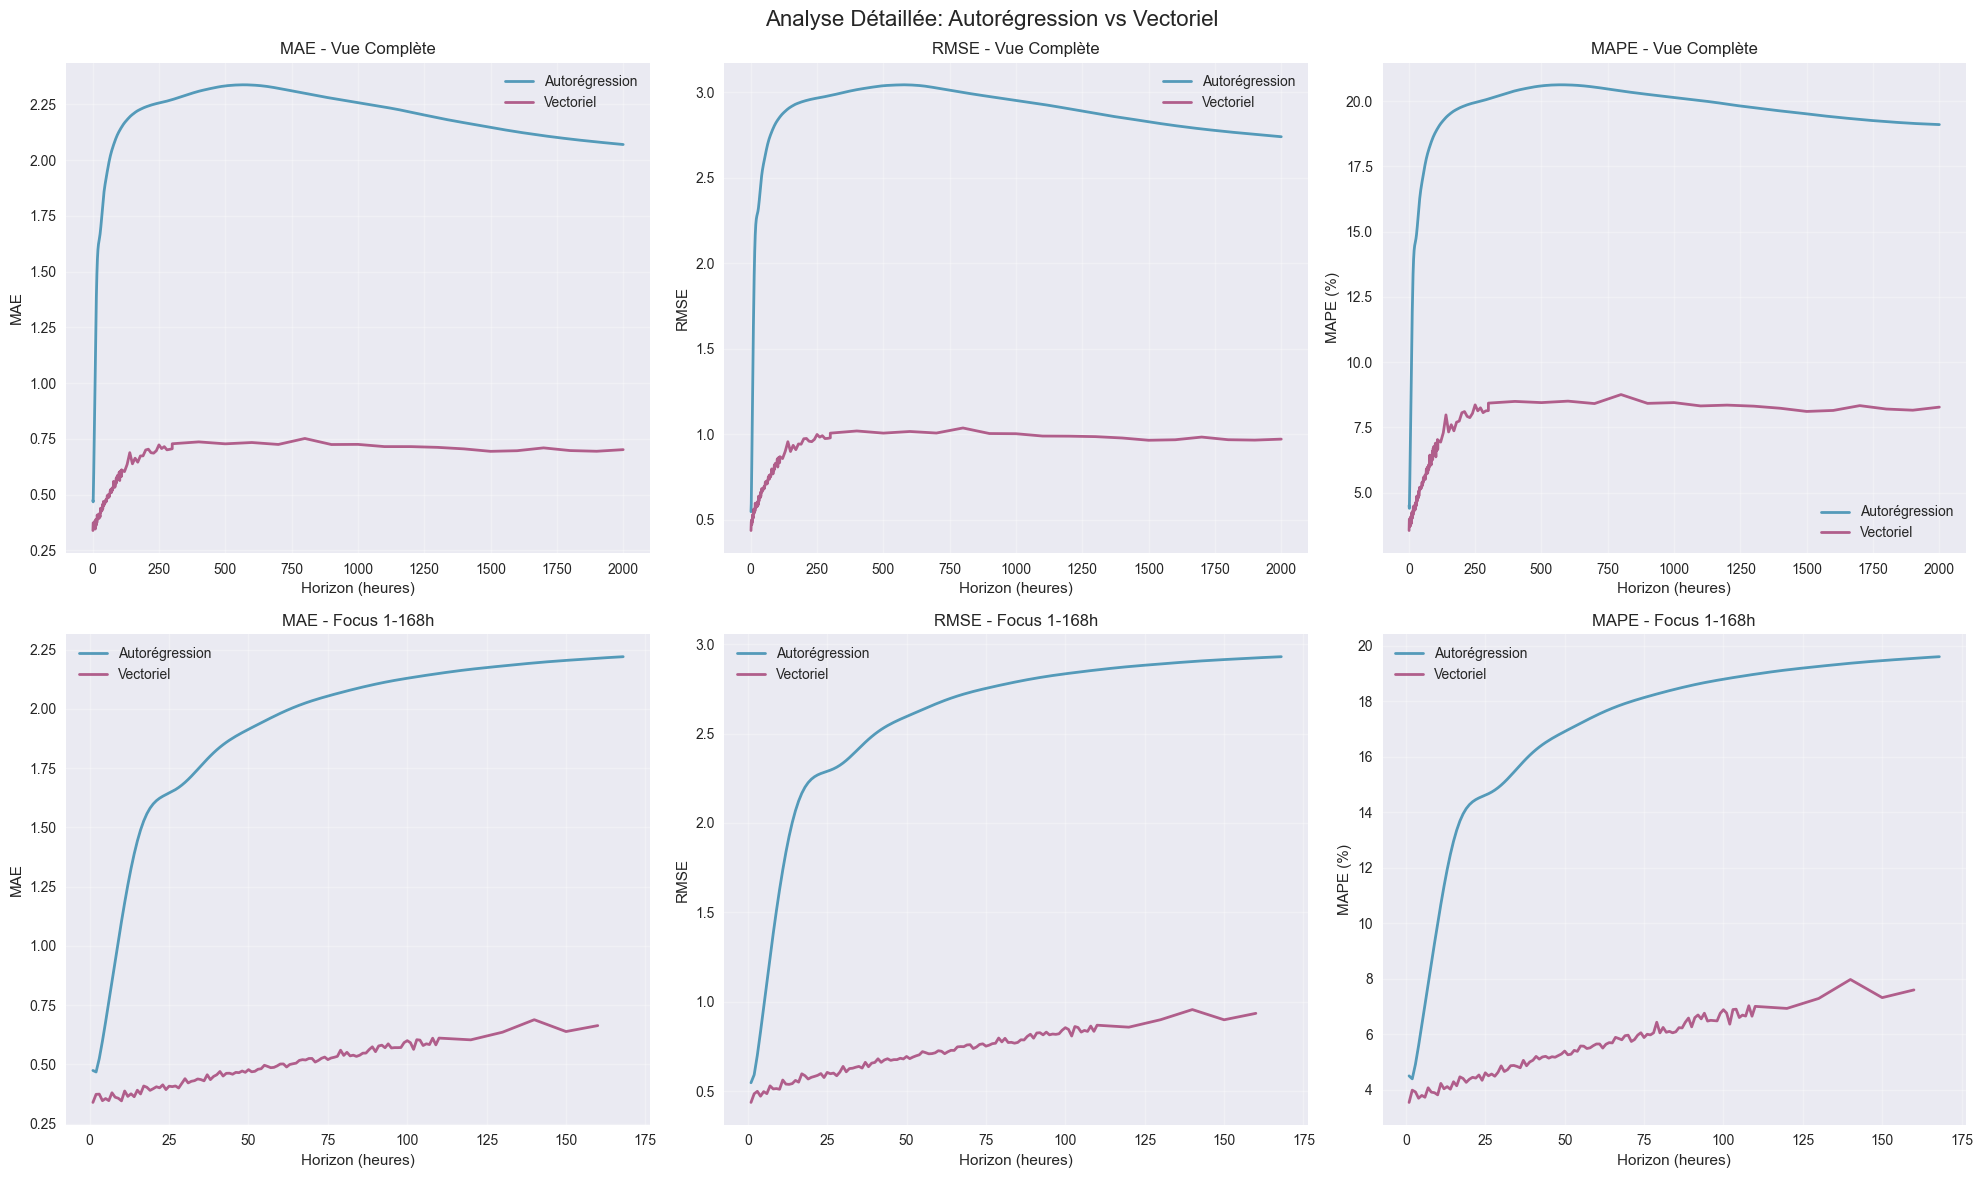

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size'] = 12

def load_and_compare_metrics(autoregressive_file='results_horizon_autoregression.csv',
                           vectoriel_file='vectoriel_results_horizon.csv',
                           max_horizon=2000):
    """
    Charge et compare les métriques des deux approches
    """
    
    print("Chargement des données...")
    
    # Charger les données autorégressives
    try:
        df_auto = pd.read_csv(autoregressive_file)
        print(f"Données autorégressives: {len(df_auto)} horizons")
    except Exception as e:
        print(f"Erreur chargement {autoregressive_file}: {e}")
        return
    
    # Charger les données vectorielles
    try:
        df_vect = pd.read_csv(vectoriel_file)
        print(f"Données vectorielles: {len(df_vect)} horizons")
    except Exception as e:
        print(f"Erreur chargement {vectoriel_file}: {e}")
        return
    
    # Filtrer jusqu'à max_horizon
    df_auto = df_auto[df_auto['horizon'] <= max_horizon].copy()
    df_vect = df_vect[df_vect['horizon'] <= max_horizon].copy()
    
    return df_auto, df_vect

def plot_metrics_comparison(df_auto, df_vect, save_plots=True):
    """
    Trace les courbes de comparaison des métriques
    """
    
    # Créer la figure avec 3 sous-graphiques
    fig, axes = plt.subplots(3, 1, figsize=(15, 18))
    fig.suptitle('Comparaison des Métriques: Autorégression vs Vectoriel', fontsize=16, y=0.98)
    
    # Couleurs pour chaque approche
    colors = {
        'autoregressive': '#2E86AB',  # Bleu
        'vectoriel': '#A23B72'        # Rouge/Rose
    }
    
    #  MAE
    axes[0].plot(df_auto['horizon'], df_auto['MAE'], 
                color=colors['autoregressive'], linewidth=2.5, 
                label='Autorégression', alpha=0.8)
    axes[0].plot(df_vect['horizon'], df_vect['MAE'], 
                color=colors['vectoriel'], linewidth=2.5, 
                label='Vectoriel', alpha=0.8)
    
    axes[0].set_title('Évolution du MAE (Mean Absolute Error)', fontsize=14, pad=20)
    axes[0].set_xlabel('Horizon (heures)')
    axes[0].set_ylabel('MAE')
    axes[0].legend(fontsize=12)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim(1, max(df_auto['horizon'].max(), df_vect['horizon'].max()))
    
    # 2. RMSE
    axes[1].plot(df_auto['horizon'], df_auto['RMSE'], 
                color=colors['autoregressive'], linewidth=2.5, 
                label='Autorégression', alpha=0.8)
    axes[1].plot(df_vect['horizon'], df_vect['RMSE'], 
                color=colors['vectoriel'], linewidth=2.5, 
                label='Vectoriel', alpha=0.8)
    
    axes[1].set_title('Évolution du RMSE (Root Mean Square Error)', fontsize=14, pad=20)
    axes[1].set_xlabel('Horizon (heures)')
    axes[1].set_ylabel('RMSE')
    axes[1].legend(fontsize=12)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim(1, max(df_auto['horizon'].max(), df_vect['horizon'].max()))
    
    #  MAPE
    axes[2].plot(df_auto['horizon'], df_auto['MAPE'], 
                color=colors['autoregressive'], linewidth=2.5, 
                label='Autorégression', alpha=0.8)
    axes[2].plot(df_vect['horizon'], df_vect['MAPE'], 
                color=colors['vectoriel'], linewidth=2.5, 
                label='Vectoriel', alpha=0.8)
    
    axes[2].set_title('Évolution du MAPE (Mean Absolute Percentage Error)', fontsize=14, pad=20)
    axes[2].set_xlabel('Horizon (heures)')
    axes[2].set_ylabel('MAPE (%)')
    axes[2].legend(fontsize=12)
    axes[2].grid(True, alpha=0.3)
    axes[2].set_xlim(1, max(df_auto['horizon'].max(), df_vect['horizon'].max()))
    
    plt.tight_layout()
    
    plt.show()

def plot_metrics_comparison_detailed(df_auto, df_vect, horizons_focus=[1, 24, 48, 168, 720, 1440], save_plots=True):
    """
    Version avec plus de détails et focus sur certains horizons
    """
    
    # Figure principale avec 6 sous-graphiques (2x3)
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Analyse Détaillée: Autorégression vs Vectoriel', fontsize=16, y=0.98)
    
    colors = {
        'autoregressive': '#2E86AB',
        'vectoriel': '#A23B72'
    }
    
    # MAE - Vue complète
    axes[0, 0].plot(df_auto['horizon'], df_auto['MAE'], 
                   color=colors['autoregressive'], linewidth=2, label='Autorégression', alpha=0.8)
    axes[0, 0].plot(df_vect['horizon'], df_vect['MAE'], 
                   color=colors['vectoriel'], linewidth=2, label='Vectoriel', alpha=0.8)
    axes[0, 0].set_title('MAE - Vue Complète')
    axes[0, 0].set_xlabel('Horizon (heures)')
    axes[0, 0].set_ylabel('MAE')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # RMSE - Vue complète
    axes[0, 1].plot(df_auto['horizon'], df_auto['RMSE'], 
                   color=colors['autoregressive'], linewidth=2, label='Autorégression', alpha=0.8)
    axes[0, 1].plot(df_vect['horizon'], df_vect['RMSE'], 
                   color=colors['vectoriel'], linewidth=2, label='Vectoriel', alpha=0.8)
    axes[0, 1].set_title('RMSE - Vue Complète')
    axes[0, 1].set_xlabel('Horizon (heures)')
    axes[0, 1].set_ylabel('RMSE')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # MAPE - Vue complète
    axes[0, 2].plot(df_auto['horizon'], df_auto['MAPE'], 
                   color=colors['autoregressive'], linewidth=2, label='Autorégression', alpha=0.8)
    axes[0, 2].plot(df_vect['horizon'], df_vect['MAPE'], 
                   color=colors['vectoriel'], linewidth=2, label='Vectoriel', alpha=0.8)
    axes[0, 2].set_title('MAPE - Vue Complète')
    axes[0, 2].set_xlabel('Horizon (heures)')
    axes[0, 2].set_ylabel('MAPE (%)')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    # Focus sur les premiers horizons (1-168h)
    focus_limit = 168
    df_auto_focus = df_auto[df_auto['horizon'] <= focus_limit]
    df_vect_focus = df_vect[df_vect['horizon'] <= focus_limit]
    
    axes[1, 0].plot(df_auto_focus['horizon'], df_auto_focus['MAE'], 
                   color=colors['autoregressive'], linewidth=2, label='Autorégression', alpha=0.8)
    axes[1, 0].plot(df_vect_focus['horizon'], df_vect_focus['MAE'], 
                   color=colors['vectoriel'], linewidth=2, label='Vectoriel', alpha=0.8)
    axes[1, 0].set_title(f'MAE - Focus 1-{focus_limit}h')
    axes[1, 0].set_xlabel('Horizon (heures)')
    axes[1, 0].set_ylabel('MAE')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    axes[1, 1].plot(df_auto_focus['horizon'], df_auto_focus['RMSE'], 
                   color=colors['autoregressive'], linewidth=2, label='Autorégression', alpha=0.8)
    axes[1, 1].plot(df_vect_focus['horizon'], df_vect_focus['RMSE'], 
                   color=colors['vectoriel'], linewidth=2, label='Vectoriel', alpha=0.8)
    axes[1, 1].set_title(f'RMSE - Focus 1-{focus_limit}h')
    axes[1, 1].set_xlabel('Horizon (heures)')
    axes[1, 1].set_ylabel('RMSE')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    axes[1, 2].plot(df_auto_focus['horizon'], df_auto_focus['MAPE'], 
                   color=colors['autoregressive'], linewidth=2, label='Autorégression', alpha=0.8)
    axes[1, 2].plot(df_vect_focus['horizon'], df_vect_focus['MAPE'], 
                   color=colors['vectoriel'], linewidth=2, label='Vectoriel', alpha=0.8)
    axes[1, 2].set_title(f'MAPE - Focus 1-{focus_limit}h')
    axes[1, 2].set_xlabel('Horizon (heures)')
    axes[1, 2].set_ylabel('MAPE (%)')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    plt.show()

# ============================================================================
# FONCTION PRINCIPALE
# ============================================================================

def main_comparison(autoregressive_file='horizon_metrics.csv',
                   vectoriel_file='vectoriel_results_horizon.csv',
                   max_horizon=2000):
    """
    Fonction principale pour la comparaison complète
    """
    
    print("=== COMPARAISON DES APPROCHES AUTORÉGRESSIVES VS VECTORIELLES ===")
    
    # Charger les données
    df_auto, df_vect = load_and_compare_metrics(autoregressive_file, vectoriel_file, max_horizon)
    
    if df_auto is None or df_vect is None:
        return
    
    # Graphiques de comparaison
    print("\nGénération des graphiques de comparaison...")
    
    # Version simple
    plot_metrics_comparison(df_auto, df_vect)
    
    # Version détaillée
    plot_metrics_comparison_detailed(df_auto, df_vect)
    

# ============================================================================
# UTILISATION
# ============================================================================

if __name__ == "__main__":
     # Exécuter la comparaison principale
    main_comparison(autoregressive_file='results_horizon_autoregression.csv',
                   vectoriel_file='vectoriel_results_horizon.csv',
                   max_horizon=2000)

In [7]:
import pickle
# Chargement depuis le fichier
with open('scalers_minmax.pkl', 'rb') as f:
    scalers_minmax = pickle.load(f)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
def load_current_predictions(predictions_cache='predictions_cache.pkl'):
    """Charge les prédictions actuellement disponibles"""
    
    predictions, true_values, samples_done = None, None, 0
    

    
    # Charger les prédictions
    if os.path.exists(predictions_cache):
        try:
            with open(predictions_cache, 'rb') as f:
                cached_data = pickle.load(f)  
            
            predictions = np.array(cached_data['predictions'])
            true_values = np.array(cached_data['true_values'])
            samples_done = len(predictions)
            
            print(f" Prédictions chargées: {predictions.shape}")
            print(f" Horizons disponibles: 1 à {predictions.shape[1]}h")
            
        except Exception as e:
            print(f"Erreur chargement cache: {e}")
            return None, None, 0
    else:
        print(" Aucun cache trouvé - le calcul n'a pas encore commencé")
        return None, None, 0
    
    return predictions, true_values, samples_done
# Charger les données depuis le cache
predictions, true_values, samples_done = load_current_predictions('predictions_cache.pkl')


 Prédictions chargées: (1825, 2000)
 Horizons disponibles: 1 à 2000h


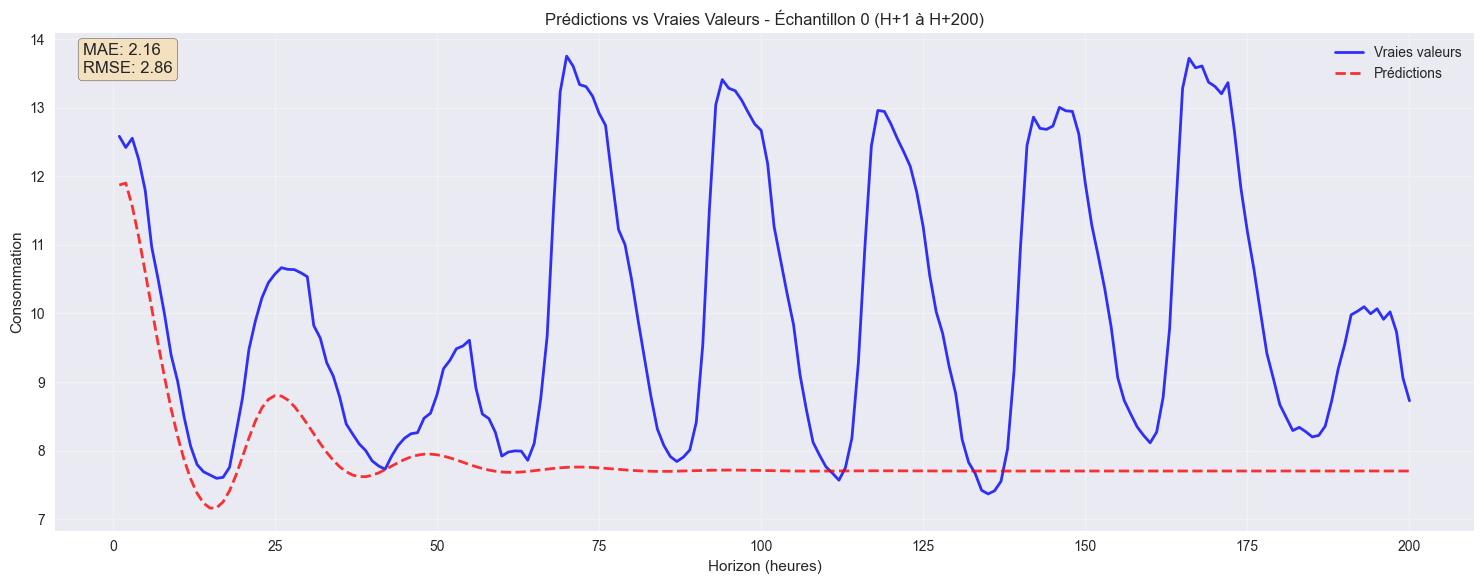

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Fonction pour visualiser les prédictions d'un échantillon
def plot_predictions_sample(predictions, true_values, scalers_minmax, 
                          sample_idx=0, max_horizon=200):
    """Visualise les prédictions vs vraies valeurs pour un échantillon"""
    
    if predictions is None or sample_idx >= len(predictions):
        print(" Échantillon non disponible")
        return
    
    # Dénormalisation
    scaler = scalers_minmax['Consommation']
    
    pred_sample = scaler.inverse_transform(
        predictions[sample_idx][:max_horizon].reshape(-1, 1)
    ).flatten()
    
    true_sample = scaler.inverse_transform(
        true_values[sample_idx][:max_horizon].reshape(-1, 1) 
    ).flatten()
    
    # Plot
    plt.figure(figsize=(15, 6))
    
    hours = np.arange(1, max_horizon + 1)
    plt.plot(hours, true_sample, 'b-', label='Vraies valeurs', linewidth=2, alpha=0.8)
    plt.plot(hours, pred_sample, 'r--', label='Prédictions', linewidth=2, alpha=0.8)
    
    plt.title(f'Prédictions vs Vraies Valeurs - Échantillon {sample_idx} (H+1 à H+{max_horizon})')
    plt.xlabel('Horizon (heures)')
    plt.ylabel('Consommation')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Calcul erreur pour cet échantillon
    mae_sample = mean_absolute_error(true_sample, pred_sample)
    rmse_sample = np.sqrt(mean_squared_error(true_sample, pred_sample))
    
    plt.text(0.02, 0.98, f'MAE: {mae_sample:.2f}\nRMSE: {rmse_sample:.2f}', 
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

plot_predictions_sample(predictions, true_values, scalers_minmax,sample_idx=0, max_horizon=200)

In [29]:
# Charger modèle
model = load_model('models\model_h2000.keras')

# Charger données
with open('X_y_test.pkl', 'rb') as f:
    data = pickle.load(f)
X_test = data['X_test']
y_test = data['y_test']

# Prédire la première séquence
X_input = X_test[0].reshape(1, *X_test.shape[1:])  # (1, 2000, n_features)
y_pred = model.predict(X_input)  # (1, 200) prediction vectorielle horizon 200



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


In [30]:
true_values = y_test[0:200].reshape(1, -1)  # On prend les 200 premières valeurs


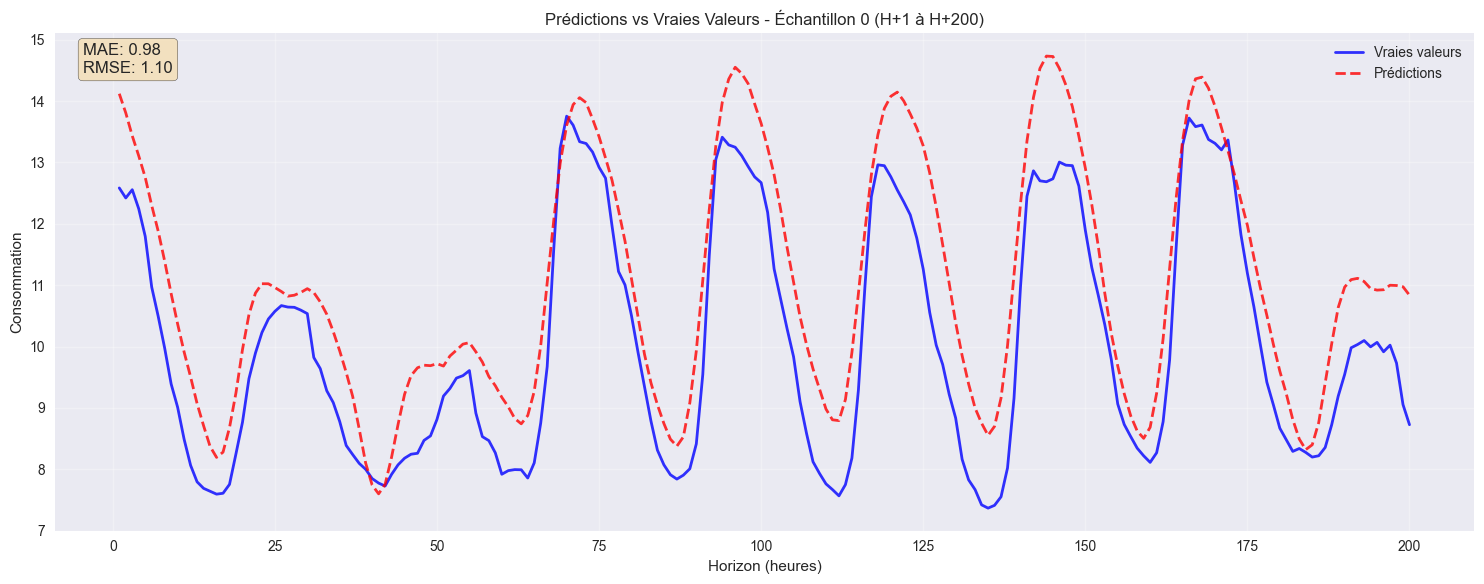

In [31]:
# Visualisation
plot_predictions_sample(y_pred, true_values, scalers_minmax, sample_idx=0, max_horizon=200)